[*********************100%***********************]  6 of 6 completed


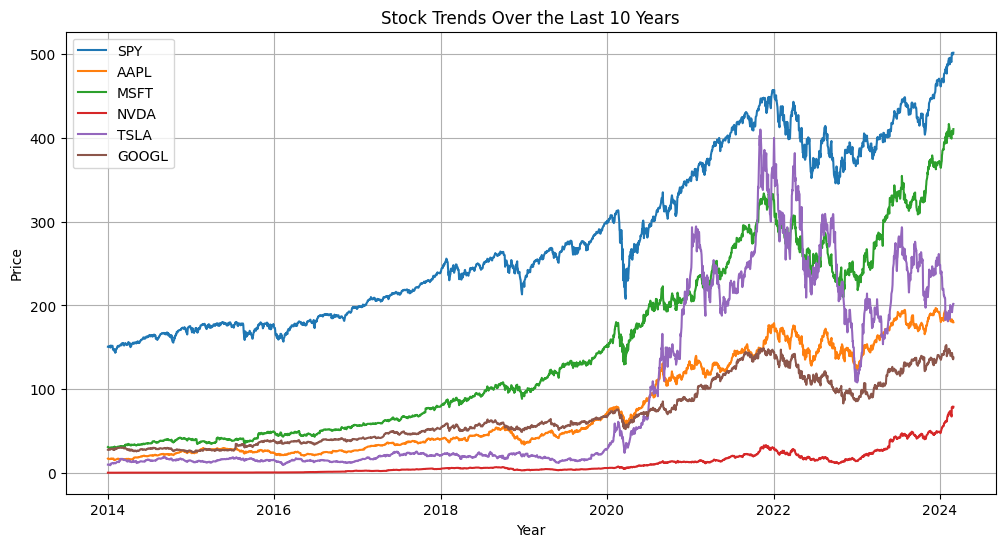

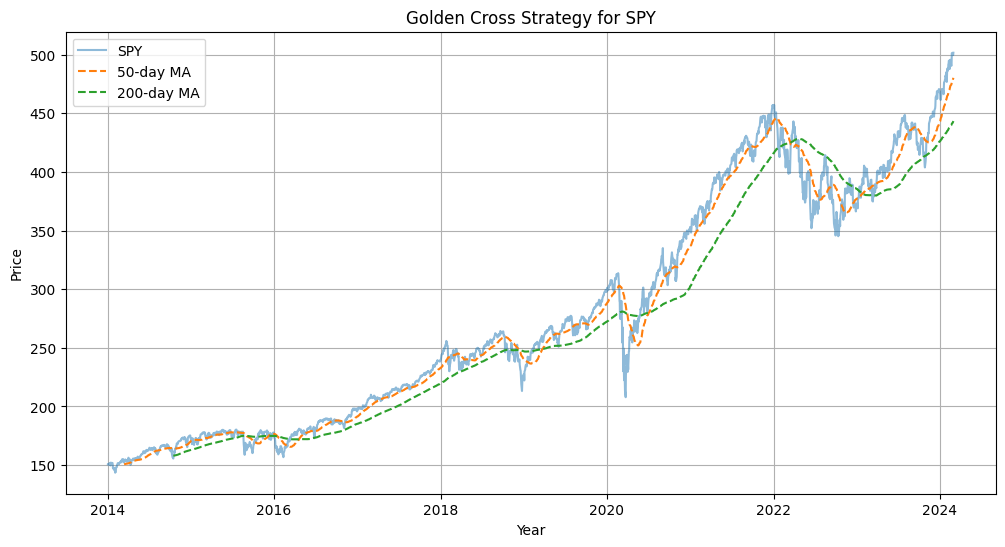

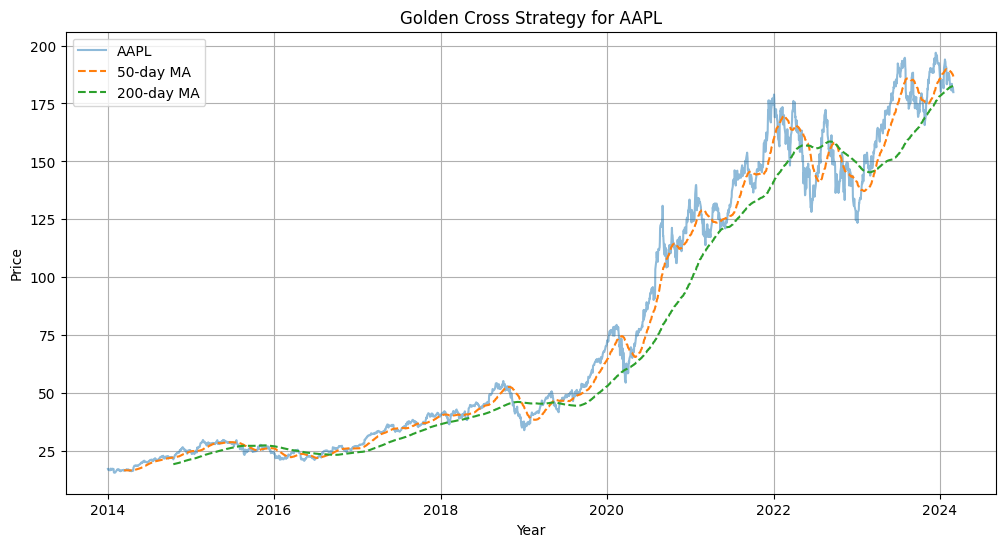

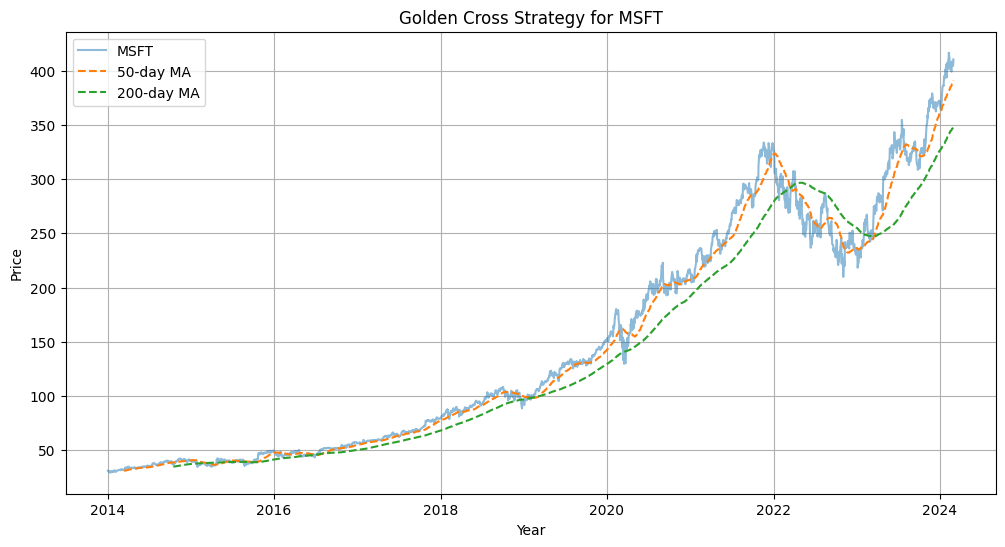

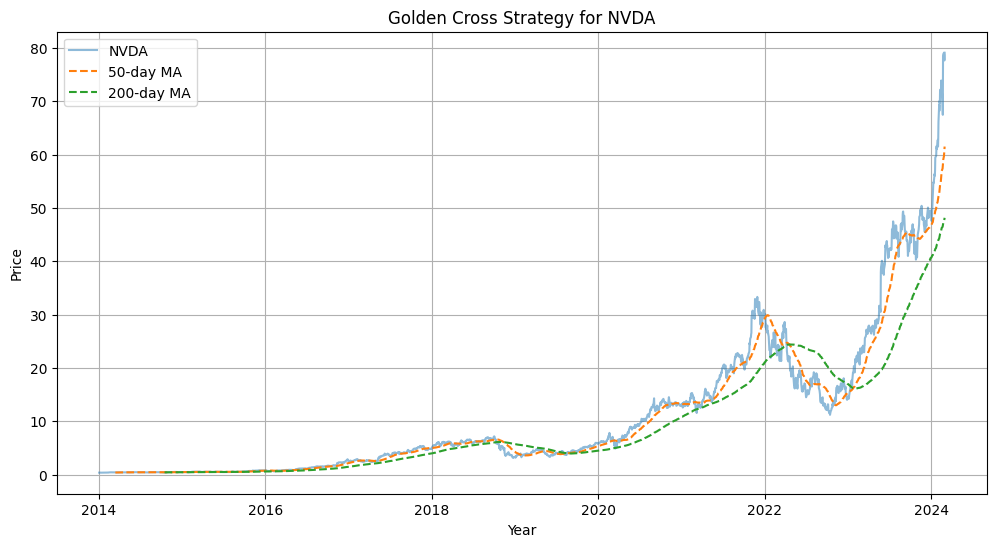

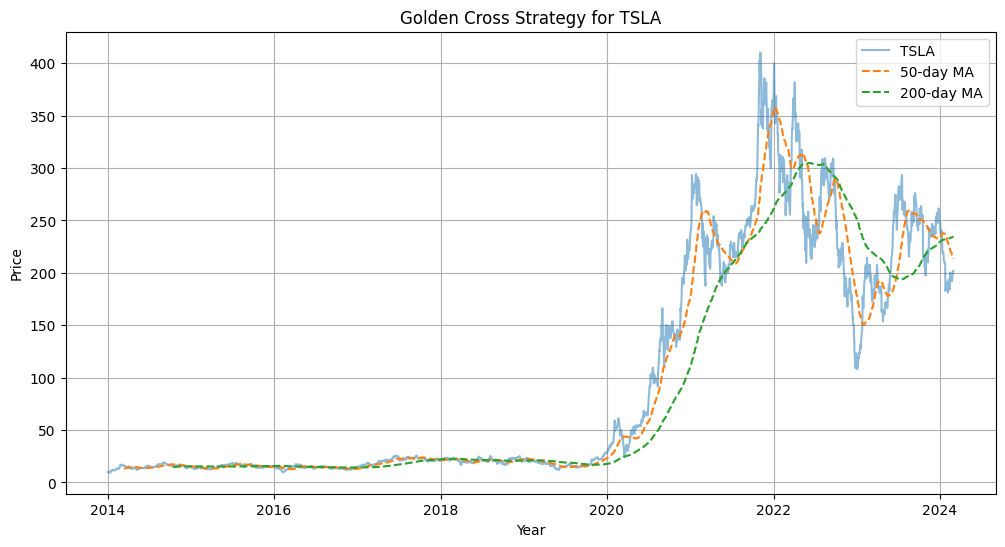

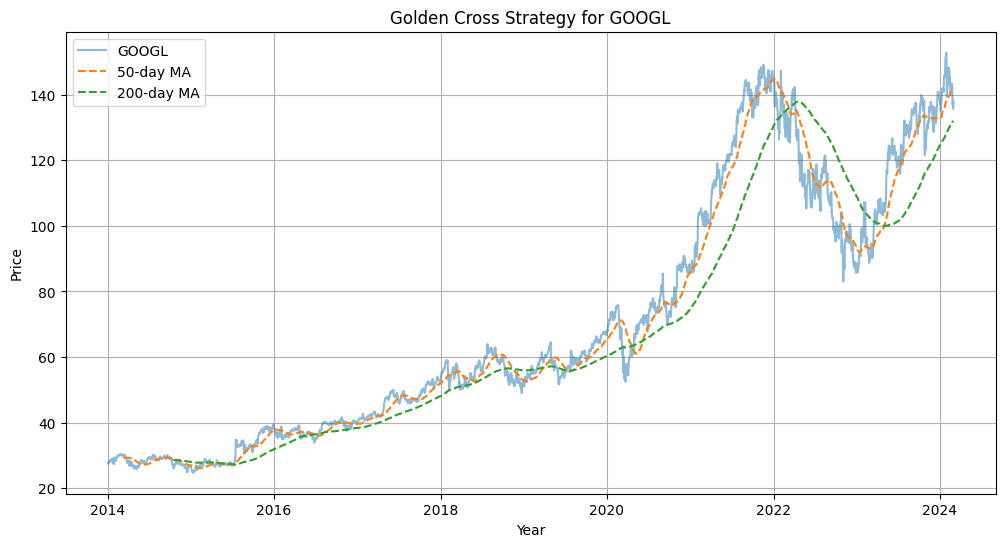

       Buy and Hold ($)  Golden Cross Strategy ($)  Buy and Hold (%)  \
SPY            32231.84                   20833.13          222.3184   
AAPL           84378.88                   52817.78          743.7888   
MSFT          112784.04                   91682.07         1027.8404   
NVDA         1896381.03                 2144864.73        18863.8103   
TSLA          133783.96                   50837.05         1237.8396   
GOOGL          51575.65                   40307.94          415.7565   

       Golden Cross Strategy (%)  
SPY                     108.3313  
AAPL                    428.1778  
MSFT                    816.8207  
NVDA                  21348.6473  
TSLA                    408.3705  
GOOGL                   303.0794  


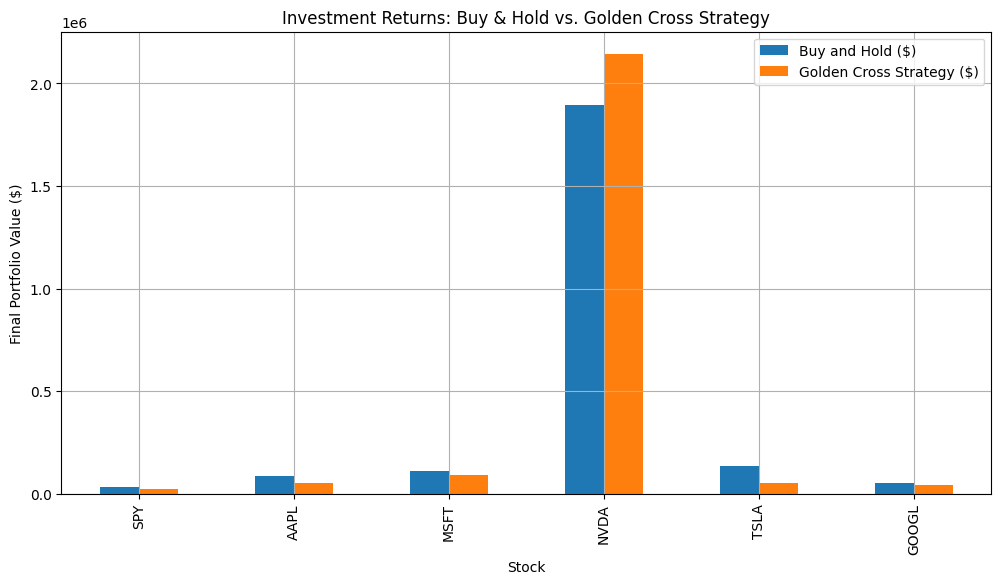

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stocks (use SPY ETF instead of ^GSPC to avoid issues)
stocks = ['SPY', 'AAPL', 'MSFT', 'NVDA', 'TSLA', 'GOOGL']
start_date = '2014-01-01'
end_date = '2024-03-01'

# Fetch historical data
raw_data = yf.download(stocks, start=start_date, end=end_date)
data = raw_data['Adj Close'] if 'Adj Close' in raw_data else raw_data['Close']

# Plot stock trends
plt.figure(figsize=(12, 6))
for stock in stocks:
    plt.plot(data[stock], label=stock)
plt.legend()
plt.title('Stock Trends Over the Last 10 Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
plt.show()

# Function to calculate moving averages and golden cross strategy
def golden_cross_strategy(stock_data, short_window=50, long_window=200):
    df = pd.DataFrame(stock_data)
    df['Short_MA'] = df[stock_data.name].rolling(window=short_window).mean()
    df['Long_MA'] = df[stock_data.name].rolling(window=long_window).mean()
    
    # Generate signals
    df['Signal'] = 0  # No position
    df.loc[df['Short_MA'] > df['Long_MA'], 'Signal'] = 1  # Buy signal
    df.loc[df['Short_MA'] < df['Long_MA'], 'Signal'] = -1  # Sell signal
    
    return df

# Analyzing the Golden Cross strategy
results = {}
for stock in stocks:
    df = golden_cross_strategy(data[stock])
    results[stock] = df
    
    # Plot moving averages
    plt.figure(figsize=(12, 6))
    plt.plot(df[stock], label=stock, alpha=0.5)
    plt.plot(df['Short_MA'], label='50-day MA', linestyle='--')
    plt.plot(df['Long_MA'], label='200-day MA', linestyle='--')
    plt.legend()
    plt.title(f'Golden Cross Strategy for {stock}')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.grid()
    plt.show()

# Investment Comparison
investment_results = {}
investment_amount = 10000  # Assume initial investment of $10,000

for stock in stocks:
    df = results[stock].dropna()
    
    if df.empty:
        continue

    # Buy and hold strategy
    initial_price = df.iloc[0][stock]
    final_price = df.iloc[-1][stock]
    buy_hold_return = round((final_price / initial_price) * investment_amount,2)

    # Golden Cross Strategy
    position = 0  # 1 means holding, 0 means not holding
    cash = investment_amount
    shares = 0
    for i in range(1, len(df)):
        if df.iloc[i-1]['Signal'] == 1 and position == 0:  # Buy
            shares = cash / df.iloc[i][stock]
            cash = 0
            position = 1
        elif df.iloc[i-1]['Signal'] == -1 and position == 1:  # Sell
            cash = shares * df.iloc[i][stock]
            shares = 0
            position = 0

    golden_cross_return = round(cash + (shares * df.iloc[-1][stock]),2)

    investment_results[stock] = {
        'Buy and Hold ($)': buy_hold_return,
        'Golden Cross Strategy ($)': golden_cross_return,
        'Buy and Hold (%)': ((buy_hold_return - investment_amount) / investment_amount) * 100,
        'Golden Cross Strategy (%)': ((golden_cross_return - investment_amount) / investment_amount) * 100
    }

# Convert results to DataFrame and display
investment_df = pd.DataFrame(investment_results).T
print(investment_df)

# Plot comparison
investment_df[['Buy and Hold ($)', 'Golden Cross Strategy ($)']].plot(kind='bar', figsize=(12, 6))
plt.title('Investment Returns: Buy & Hold vs. Golden Cross Strategy')
plt.ylabel('Final Portfolio Value ($)')
plt.xlabel('Stock')
plt.grid()
plt.show()


In [4]:
investment_df

,Buy and Hold ($),Golden Cross Strategy ($),Buy and Hold (%),Golden Cross Strategy (%)
SPY,3.223184e+04,2.083313e+04,222.318407,108.331322
AAPL,8.437888e+04,5.281778e+04,743.788846,428.177762
MSFT,1.127840e+05,9.168207e+04,1027.840382,816.820654
NVDA,1.896381e+06,2.144865e+06,18863.810300,21348.647271
TSLA,1.337840e+05,5.083705e+04,1237.839648,408.370480
GOOGL,5.157565e+04,4.030794e+04,415.756487,303.079449
